In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df['children'] = df['children'].astype('object')

<Axes: xlabel='expenses', ylabel='Count'>

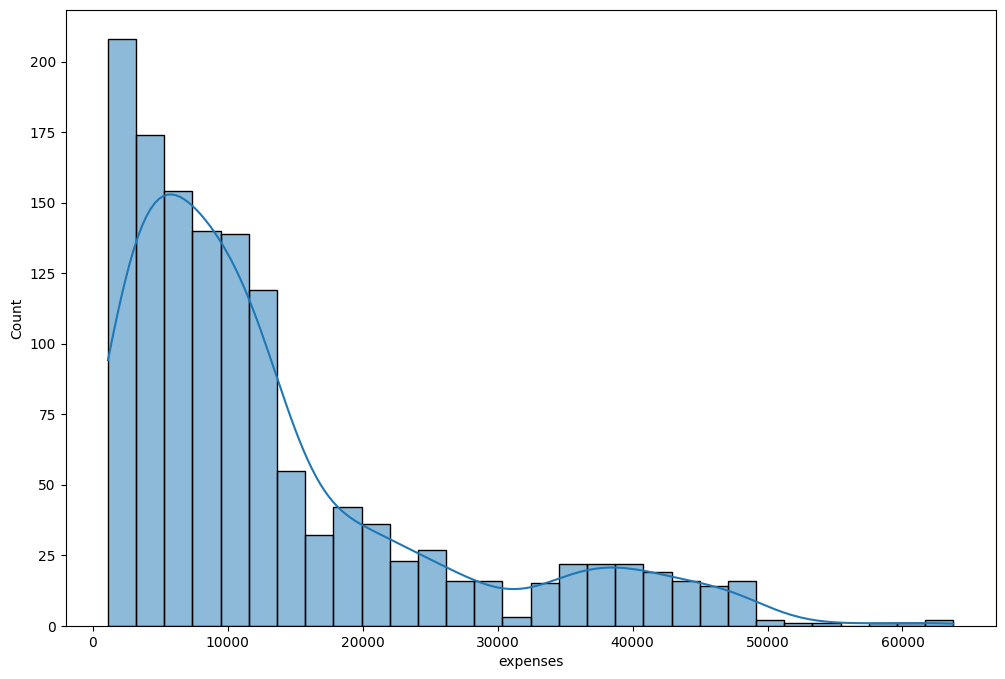

In [ ]:
plt.figure(figsize = (12,8))
sns.histplot(x= 'expenses',data = df,kde = True)

In [ ]:
df['expenses'] = np.sqrt(df['expenses'])

In [ ]:
df.head(4)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,129.941987
1,18,male,33.8,1,no,southeast,41.539740
2,28,male,33.0,3,no,southeast,66.704273
3,33,male,22.7,0,no,northwest,148.271609


<Axes: xlabel='expenses', ylabel='Count'>

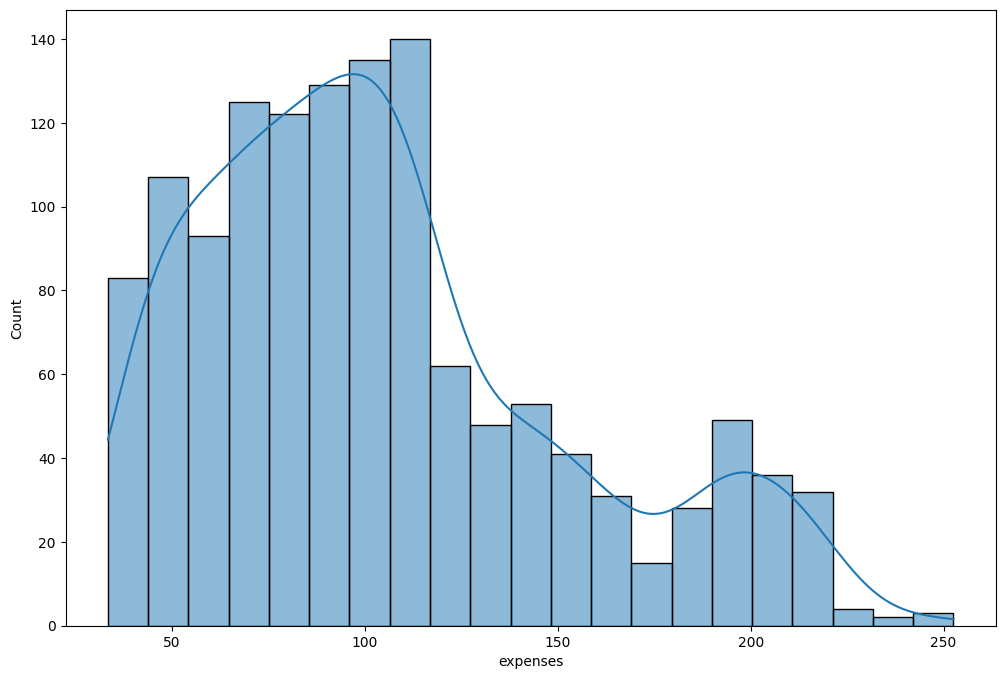

In [ ]:
plt.figure(figsize = (12,8))
sns.histplot(x= 'expenses',data = df,kde = True)

In [ ]:
df['expenses'] = np.log(df['expenses'])

<Axes: xlabel='expenses', ylabel='Count'>

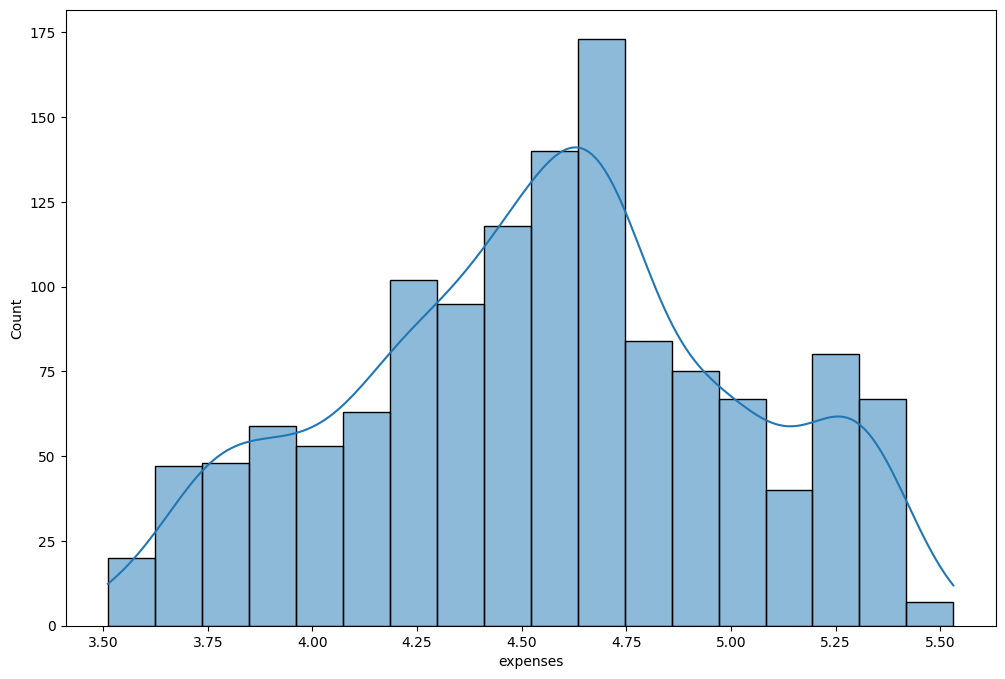

In [ ]:
plt.figure(figsize = (12,8))
sns.histplot(x= 'expenses',data = df,kde = True)

In [ ]:
cat_columns = df.select_dtypes(include = 'object').columns
cat_columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [ ]:
df  = pd.get_dummies(df,cat_columns,drop_first = True)

<ipython-input-11-18ae6e37b0ad>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df  = pd.get_dummies(df,cat_columns,drop_first = True)


In [ ]:
y = df['expenses']

In [ ]:
X = df[['age', 'bmi', 'sex_male', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=410)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions = lm.predict(X_test)
predictions

array([4.3127778 , 4.95765876, 5.33233891, 4.11126326, 4.5683338 ,
       4.42349739, 5.29055137, 4.34774602, 4.57679524, 4.27964764,
       5.41564637, 4.52848915, 4.40349086, 4.41929262, 3.88053367,
       4.46223144, 4.64003725, 4.92909848, 4.78251444, 4.00005177,
       5.0752285 , 5.47085156, 4.73975023, 4.67635834, 5.25694966,
       4.35562312, 4.11965955, 4.2056885 , 4.72625255, 4.17186938,
       4.12868113, 4.07320917, 4.64256253, 4.78391417, 3.98248721,
       4.89370417, 3.98925372, 4.68714165, 4.39015442, 4.01377995,
       4.53953403, 4.74691429, 4.77075979, 4.05048208, 5.53813053,
       3.86150821, 4.44941827, 4.01395216, 4.43738869, 4.44400584,
       4.46559005, 4.02876157, 5.51648256, 4.11067578, 3.91930817,
       4.06500399, 4.30570813, 5.2960622 , 4.96081511, 5.05998833,
       3.92806714, 5.30553246, 5.00313948, 4.20252468, 4.05216241,
       4.4006221 , 4.51874582, 4.46079216, 4.48080453, 4.7866989 ,
       4.54576832, 4.79533636, 4.74961411, 4.04026299, 4.57518

Text(0, 0.5, 'Predicted Y')

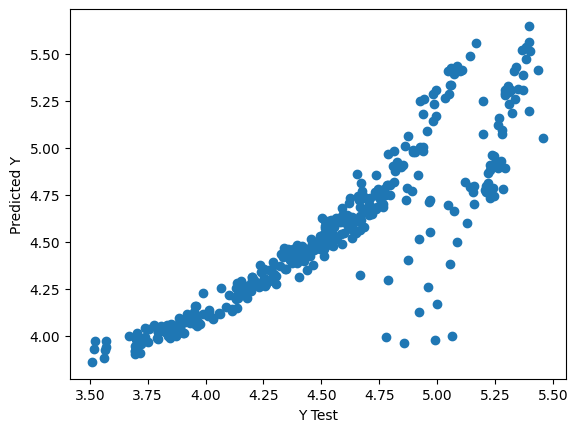

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.14561881406201269
MSE: 0.04701149503016618
RMSE: 0.21682134357614838


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)*100

79.68172378460243